## Workflow of decode_lab_code package - a reader package
This is meant to be a demonstration of the decode_lab_code toolbox. We will read and wrangle data, convert and save as an NWB file, read and wrangle that NWB file, preprocess and save new results. We will also visualize the data

Installation:
1. conda create -n decode_lab_env python=3.9
2. conda activate decode_lab_env
3. git clone https://github.com/JohnStout/decode_lab_code
4. cd decode_lab_code
5. pip install - e.

# Start off with the quick and dirty - updated version


In [3]:
from hernan_lab_to_nwb.readers import ioreaders
from hernan_lab_to_nwb.readers.ioreaders import load_nwb
from hernan_lab_to_nwb.utils import ephys_plotters
from hernan_lab_to_nwb.utils import nwb_utils
import matplotlib.pyplot as plt
import numpy as np

# STEP 1) OBJECT INSTANTIATION AND DATA READING
folder_path = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS' # folder path
data_object = ioreaders.read_nlx(folder_path) # we first instantiate the object
data_object.read_ephys() # read data

# edit the pandas array
data_object.csc_grouping_table = nwb_utils.pandas_excel_interactive(dir = data_object.folder_path, df = data_object.csc_grouping_table)
data_object.tt_grouping_table = nwb_utils.pandas_excel_interactive(dir = data_object.folder_path, df = data_object.tt_grouping_table)

data_object.write_nwb()

Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Working with TT
Detected clustered data in TT1_FILTERED_clustered.ntt
Detected clustered data in TT3_FILTERED_Clustered.ntt
Detected clustered data in TT4_FILTERED_Clustered.ntt
File saved to  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwb_excel_sheet.xlsx
File saved to  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwb_excel_sheet.xlsx
nwb_template.xlsx written to /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS
Removing:
 1    TT1_filtered.ntt
2    TT2_filtered.ntt
4    TT3_filtered.ntt
6    TT4_filtered.ntt
Name: Name, dtype: object Series([], Name: Name, dtype: object)
This make take a few moments if working with a lot of CSC data...
Save .nwb file to:  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb
Validating /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb against cac

First lets load in some packages

In [1]:
from hernan_lab_to_nwb.readers import ioreaders
from hernan_lab_to_nwb.readers.ioreaders import load_nwb
import matplotlib.pyplot as plt
import numpy as np

Cite pynwb, neo, and CatalystNeuro team
Please note, if there are multiple start/stops, more data is collected after a stopping recording. You must trim the CSC.
TODO: MUST CHECK ALL SLICING FOR [a:b], MUST BE [a::b]


### Lets read in some ephys data acquired on the Neuralynx system

folder_path: directory of data

From the readers file, we will be working with the **"read_nlx"** object. To work with this object, we must "instantiate" it by running the required inputs. In this case, read_nlx requires the folder_path

When instantiating a reader object, we will always get a .history attribute. 
".history" tells us the variable names in the object as well as what they mean

After instantiating the object and telling it where to search for data, we will run the **".read_ephys"** method from the data_object. This will read in our ephys data.

#### **read_ephys()** uses a modified version of the open source neo package to read neuralynx acquired data, then it organizes the data according to extension type

This also accounts for timing offsets native to neuralynx

In [2]:
# define a folder_path
#folder_path = '/Users/js0403/local data/2021-03-31_08-59-02 16eB R1 10min rec after sec drive cells on 2 and 3 - Control'
folder_path = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS'

# first, we instantiate the object. read_nlx needs to know where to pull from.
data_object = ioreaders.read_nlx(folder_path) # we first instantiate the object
print("Here is a list of attributes added upon instantiation:",data_object.history)

# now lets read the ephys data.
data_object.read_ephys()

Here is a list of attributes added upon instantiation: ['folder_path: directory of data - added', 'session_id: session identification variables - added', 'dir_contents: the contents in the current directory - added']
Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Working with TT
Detected clustered data in TT1_FILTERED_clustered.ntt
Detected clustered data in TT3_FILTERED_Clustered.ntt
Detected clustered data in TT4_FILTERED_Clustered.ntt


##### Read the history attribute to see your variables
history reports on available attributes (which can typically be seen by adding a period next to your object), followed by a description as such

folder_path (attribute name): directory of the dataset (definition)

In [3]:
data_object.history

['folder_path: directory of data - added',
 'session_id: session identification variables - added',
 'dir_contents: the contents in the current directory - added',
 'event_strings: Event variables during recordings (in written format)',
 'event_times: Event variables during recordings (in seconds)',
 'csc_data: CSC data as grouped by ext .ncs',
 'csc_data_names: names of data in csc_data as organized by .ncs files',
 'csc_data_fs: sampling rate for CSC data, defined by .ncs extension',
 'csc_times: timestamps for csc data - accounts for multiple start/stop times',
 'csc_grouping_table: pandas DataFrame to organize csc. This is good if you want to cluster data as the NWB file will detect your organization. try adding structure columns and tetrode grouping columns!',
 'csc_grouping_table.TetrodeGroup: group for tetrode assignment (CSC1-4 might belong to Tetrode 1)',
 'csc_grouping_table.BrainRegion: Enter Structure',
 'csc_grouping_table.Inclusion: default is True, set to False if you wa

### Notice that multiple start/stop times were detected and therefore, that should be represented in the LFP signal

Text(0, 0.5, 'Neuralynx Time')

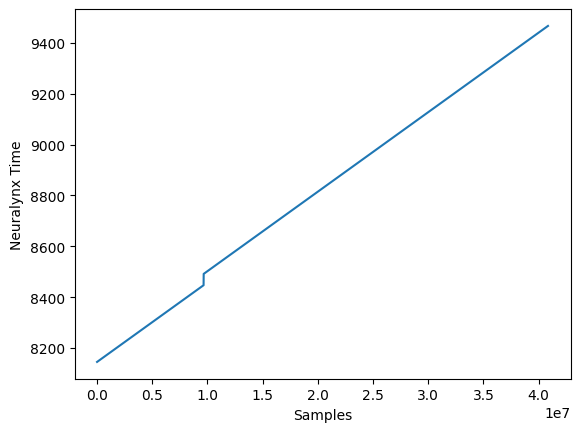

In [4]:
plt.plot(data_object.csc_times)
plt.xlabel('Samples')
plt.ylabel('Neuralynx Time')

### You can read the header for additional information

In [5]:
data_object.read_header()
data_object.header

{'channel_names': ['CSC1'],
 'FileType': 'CSC',
 'FileVersion': '3.3.0',
 'RecordSize': '1044',
 'HardwareSubSystemName': 'AcqSystem1',
 'HardwareSubSystemType': 'DigitalLynxSX',
 'sampling_rate': 32000.0,
 'ADMaxValue': '32767',
 'bit_to_microVolt': [0.030518510385491027],
 'NumADChannels': '1',
 'channel_ids': [0],
 'InputRange': [1000],
 'input_inverted': True,
 'DSPLowCutFilterEnabled': 'True',
 'DspLowCutFrequency': '0.1',
 'DspLowCutNumTaps': '0',
 'DspLowCutFilterType': 'DCO',
 'DSPHighCutFilterEnabled': 'True',
 'DspHighCutFrequency': '9000',
 'DspHighCutNumTaps': '32',
 'DspHighCutFilterType': 'FIR',
 'DspDelayCompensation': 'Disabled',
 'DspFilterDelay_µs': '484',
 'CheetahRev': '5.6.3',
 'SamplingFrequency': '32000',
 'ApplicationName': 'Cheetah',
 'ApplicationVersion': <Version('5.6.3')>,
 'recording_opened': datetime.datetime(2020, 6, 26, 16, 56, 21, 357000),
 'recording_closed': datetime.datetime(2020, 6, 26, 17, 20, 42, 440000)}

### Easy to plot

**IMPORTANT** 

These methods aren't meant to replace using matplotlib or other packages, but instead meant to provide users with quick plotting tools

For example, maybe you just want to take a peak at your data. Or look for a certain time range, or quickly rereference your signal before running through pynapple based transformations/analyses

In [21]:
list_data = list(data_object.csc_data.values())
list_data[0].shape

(40848770,)

/Users/js0403/hernan-lab-to-nwb/hernan_lab_to_nwb/utils/ephys_plotters.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


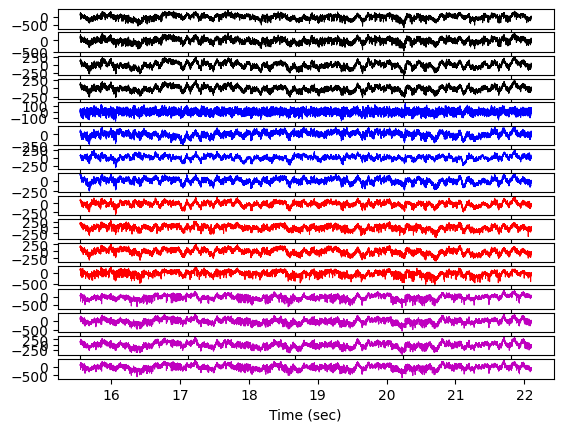

In [25]:
from hernan_lab_to_nwb.utils import ephys_plotters
colors = ['k','k','k','k','b','b','b','b','r','r','r','r','m','m','m','m']
ephys_plotters.multi_plotter(data=data_object.csc_data, fs = 32000,time_range=[15.55,22.1], color=colors)

# NWB

This is a very handson process, but the energy barrier is significantly lower than if you were to try and enter this information and change/run code each time

#### The _**csc_grouping_table**_ and _**tt_grouping_table**_ variables are **REQUIRED** variables to change

---

.csc_grouping_table gives us the flexibility of grouping our CSC channels together. So for example, if CSC1-4 belong to tetrode 1, you can assign it to Tetrode1 for NWB creation.

If working with TT1abcd nomenclature + other channels with strictly lowpass filtered/downsampled LFPs (CSC1-4), you can assign them here!

**IMPORTANT**

You can also remove tetrodes if you want! Set inclusion to False

**NOTICE** That as it stands, this array is empty

### **When to set Inclusion to False**
You should set Inclusion to false particularly on .ntt files that you don't care about. So for example, if you have TT1.ntt, but only clustered TT1_clustered.ntt, then consider excluding TT1.ntt by setting it to False


In [26]:
data_object.csc_grouping_table

,Name,TetrodeGroup,BrainRegion,Inclusion
0,CSC1.ncs,[],[],True
1,CSC2.ncs,[],[],True
2,CSC3.ncs,[],[],True
3,CSC4.ncs,[],[],True
4,CSC5.ncs,[],[],True
5,CSC6.ncs,[],[],True
6,CSC7.ncs,[],[],True
7,CSC8.ncs,[],[],True
8,CSC9.ncs,[],[],True
9,CSC10.ncs,[],[],True


In [27]:
data_object.tt_grouping_table

,Name,TetrodeGroup,BrainRegion,Inclusion
0,TT1_FILTERED_clustered.ntt,[],[],True
1,TT1_filtered.ntt,[],[],True
2,TT2_filtered.ntt,[],[],True
3,TT3_FILTERED_Clustered.ntt,[],[],True
4,TT3_filtered.ntt,[],[],True
5,TT4_FILTERED_Clustered.ntt,[],[],True
6,TT4_filtered.ntt,[],[],True


#### Lets change information in the table to run NWB formatting
---

We don't want to make any assumptions about which channels belong to which tetrode because naming conventions can vary between experimenters and such.

This is very hands-on and requires you to change information in the __grouping_table_ variables

**Compare** the results of before/after adding this information

In [28]:
# grouping variables
cscTetrodeGroup = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
cscBrainRegion = ['PFC'] * data_object.csc_grouping_table.shape[0]

# assign them to the Pandas array
data_object.csc_grouping_table['BrainRegion']=cscBrainRegion
data_object.csc_grouping_table['TetrodeGroup']=cscTetrodeGroup

# assign tetrodes
ttInclusion=[True,False,False,True,False,True,False]
ttTetrodeGroup = [1,1,2,3,3,4,4]
data_object.tt_grouping_table['BrainRegion']=['PFC'] * data_object.tt_grouping_table.shape[0]
data_object.tt_grouping_table['TetrodeGroup']=ttTetrodeGroup
data_object.tt_grouping_table['Inclusion']=ttInclusion


In [29]:
# print output to visualize
data_object.csc_grouping_table

,Name,TetrodeGroup,BrainRegion,Inclusion
0,CSC1.ncs,1,PFC,True
1,CSC2.ncs,1,PFC,True
2,CSC3.ncs,1,PFC,True
3,CSC4.ncs,1,PFC,True
4,CSC5.ncs,2,PFC,True
5,CSC6.ncs,2,PFC,True
6,CSC7.ncs,2,PFC,True
7,CSC8.ncs,2,PFC,True
8,CSC9.ncs,3,PFC,True
9,CSC10.ncs,3,PFC,True


In [30]:
data_object.tt_grouping_table

,Name,TetrodeGroup,BrainRegion,Inclusion
0,TT1_FILTERED_clustered.ntt,1,PFC,True
1,TT1_filtered.ntt,1,PFC,False
2,TT2_filtered.ntt,2,PFC,False
3,TT3_FILTERED_Clustered.ntt,3,PFC,True
4,TT3_filtered.ntt,3,PFC,False
5,TT4_FILTERED_Clustered.ntt,4,PFC,True
6,TT4_filtered.ntt,4,PFC,False


#### Now we can write the NWB file to path

In [31]:
data_object.write_nwb()

/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/pynwb/file.py:471: UserWarning: Date is missing timezone information. Updating to local timezone.
  args_to_set['session_start_time'] = _add_missing_timezone(session_start_time)


Removing:
 1    TT1_filtered.ntt
2    TT2_filtered.ntt
4    TT3_filtered.ntt
6    TT4_filtered.ntt
Name: Name, dtype: object Series([], Name: Name, dtype: object)
This make take a few moments if working with a lot of CSC data...
Save .nwb file to:  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb
Validating /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb against cached namespace information using namespace 'core'.
NWB validation may be incorrect. Still need an invalid NWB file to check against....10/10/2023
No errors detected in NWB file


# Quick and dirty version

Step 1: object instantiation and data reading

Step 2: group and variable assignment - Hands-on**

Step 3: write NWB file

In [1]:
from decode_lab_code.readers import ioreaders
from decode_lab_code.readers.ioreaders import load_nwb
from decode_lab_code.preprocessing import signal_utils
import matplotlib.pyplot as plt
import numpy as np

# STEP 1) OBJECT INSTANTIATION AND DATA READING
folder_path = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS' # folder path
data_object = ioreaders.read_nlx(folder_path) # we first instantiate the object
data_object.read_ephys() # read data

# STEP 2) GROUP AND VARIABLE ASSIGNMENT

# grouping variables
cscTetrodeGroup = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
cscBrainRegion = ['PFC'] * data_object.csc_grouping_table.shape[0]

# assign them to the Pandas array
data_object.csc_grouping_table['BrainRegion']=cscBrainRegion
data_object.csc_grouping_table['TetrodeGroup']=cscTetrodeGroup

# assign tetrodes
ttInclusion=[True,False,False,True,False,True,False]
ttTetrodeGroup = [1,1,2,3,3,4,4]
data_object.tt_grouping_table['BrainRegion']=['PFC'] * data_object.tt_grouping_table.shape[0]
data_object.tt_grouping_table['TetrodeGroup']=ttTetrodeGroup
data_object.tt_grouping_table['Inclusion']=ttInclusion

# STEP 3) WRITE NWB FILE
data_object.write_nwb()

Cite pynwb, neo, and CatalystNeuro team
Please note, if there are multiple start/stops, more data is collected after a stopping recording. You must trim the CSC.
TODO: MUST CHECK ALL SLICING FOR [a:b], MUST BE [a::b]
Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Working with TT
Detected clustered data in TT1_FILTERED_clustered.ntt
Detected clustered data in TT3_FILTERED_Clustered.ntt
Detected clustered data in TT4_FILTERED_Clustered.ntt


/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/pynwb/file.py:471: UserWarning: Date is missing timezone information. Updating to local timezone.
  args_to_set['session_start_time'] = _add_missing_timezone(session_start_time)


Removing:
 1    TT1_filtered.ntt
2    TT2_filtered.ntt
4    TT3_filtered.ntt
6    TT4_filtered.ntt
Name: Name, dtype: object Series([], Name: Name, dtype: object)
This make take a few moments if working with a lot of CSC data...
Save .nwb file to:  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb
Validating /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb against cached namespace information using namespace 'core'.
NWB validation may be incorrect. Still need an invalid NWB file to check against....10/10/2023
No errors detected in NWB file


## Visualizing and extracting information from NWB files manually

Note that many neuroscience-based packages have their own methods to extract NWB information



In [2]:
nwbfile=load_nwb(folder_path=data_object.folder_path,data_name='nwbfile.nwb')

In [3]:
from nwbwidgets import nwb2widget
nwb2widget(nwbfile)

/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/traitlets/__init__.py:26: DeprecationWarning: 
            Sentinel is not a public part of the traitlets API.
            It was published by mistake, and may be removed in the future.
            
  warn(
/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/traittypes/traittypes.py:188: DeprecationWarning: metadata {'dtype': None} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  super(DataFrame, self).__init__(


/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/traitlets/traitlets.py:1404: DeprecationWarning: Passing unrecognized arguments to super(IntText).__init__(min=0).
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


# Perform preprocessing procedures on your signal

In [6]:
# rereference your signal
data_object.rereference()

In [7]:
data_object.history

['folder_path: directory of data - added',
 'session_id: session identification variables - added',
 'dir_contents: the contents in the current directory - added',
 'LOGGER: csc_data had multiple blocks. This is likely due to multiple start/stops when recording. LFP and times were concatenated into a single array.',
 'csc_data: CSC data as grouped by ext .ncs',
 'csc_data_names: names of data in csc_data as organized by .ncs files',
 'csc_data_fs: sampling rate for CSC data, defined by .ncs extension',
 'tt_data: Tetrode data as grouped by ext .ntt',
 'tt_data_names: names of data in tt_data as organized by .ntt files',
 'tt_data_fs: hard coded to 32kHz after not detected neo extraction of sampling rate',
 'csc_data_reref: rereferenced using the common average']

/Users/js0403/decode_lab_code/src/decode_lab_code/core/ephys.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


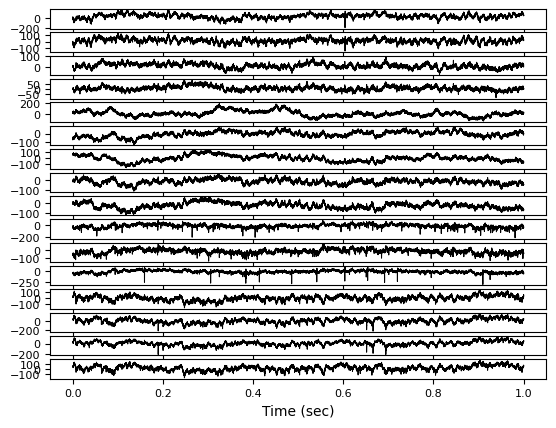

In [15]:
data_object.lfp_plotter(time_range=[0,1],csc_attribute='csc_data_reref')